In [ ]:
import pandas as pd
!pip install xlrd

# Load the dataset (assuming the data is in a CSV file)
file_path = '/content/combined_data (1).xlsx'  # Path to the dataset
df = pd.read_excel(file_path)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful time-related features
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.dayofweek

# Display the first few rows of the dataframe
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,antecedents,...,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Hour,Day
0,1,2024-01-28,CUST001,Male,58,Beauty,2,163,326,frozenset({'Toys'}),...,0.430,0.413,0.179,0.416279,1.007940,0.001410,1.005618,0.013819,0,6
1,1,2024-03-08,CUST002,Male,44,Clothing,3,296,888,frozenset({'Books'}),...,0.413,0.430,0.179,0.433414,1.007940,0.001410,1.006026,0.013419,0,4
2,1,2024-01-28,CUST003,Female,56,Toys,2,230,460,frozenset({'Electronics'}),...,0.609,0.413,0.258,0.423645,1.025776,0.006483,1.018470,0.064266,0,6
3,2,2024-06-01,CUST004,Male,67,Toys,1,388,388,frozenset({'Groceries'}),...,0.413,0.609,0.258,0.624697,1.025776,0.006483,1.041826,0.042807,0,5
4,2,2024-01-03,CUST005,Male,41,Books,2,75,150,"frozenset({'Clothing', 'Beauty'})",...,0.311,0.413,0.130,0.418006,1.012122,0.001557,1.008602,0.017383,0,2


# Data Analysis

In [ ]:
print(df.columns)
print(df.shape[0])


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric', 'Hour', 'Day'],
      dtype='object')
2463


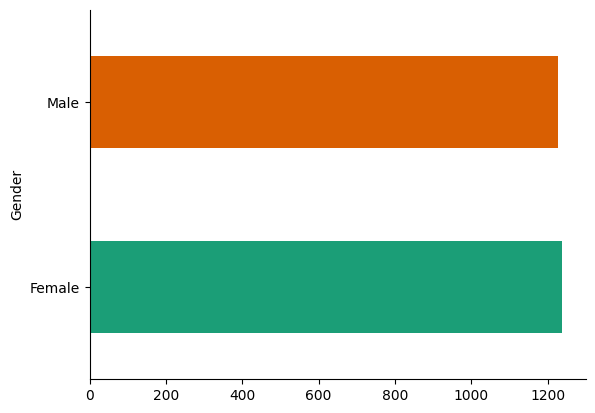

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

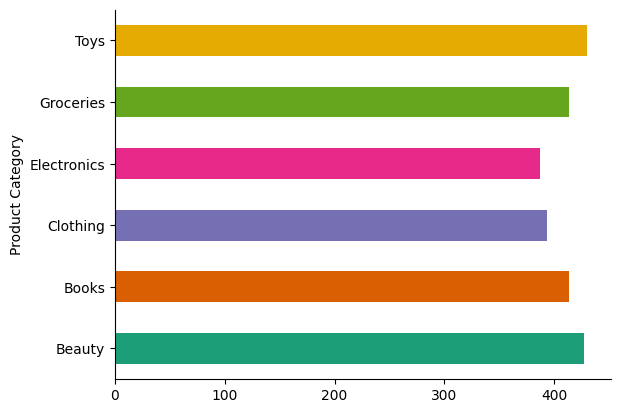

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Product Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Average order value: 500.5265935850589


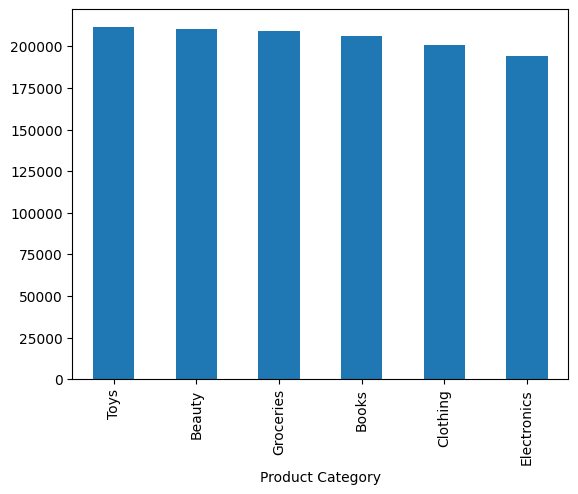

In [ ]:

# 1. Analyze sales trends over time.
sales_by_date = df.groupby('Date')['Total Amount'].sum()
sales_by_date.plot()

# 2. Identify top-selling product categories.
top_categories = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
top_categories.plot(kind='bar')

# 3. Calculate average order value.
average_order_value = df['Total Amount'].mean()
print(f'Average order value: {average_order_value}')


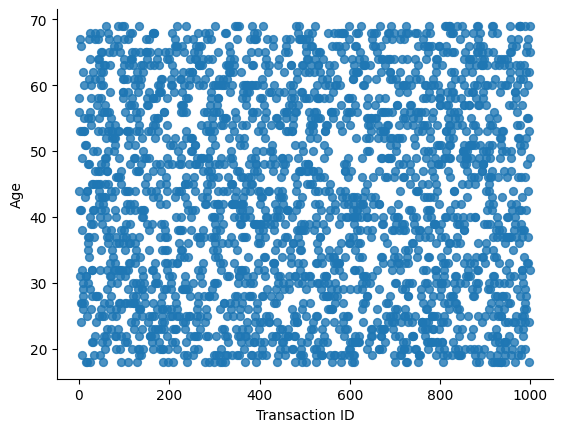

In [ ]:
# @title Transaction ID vs Age

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Transaction ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Analysing the peak time

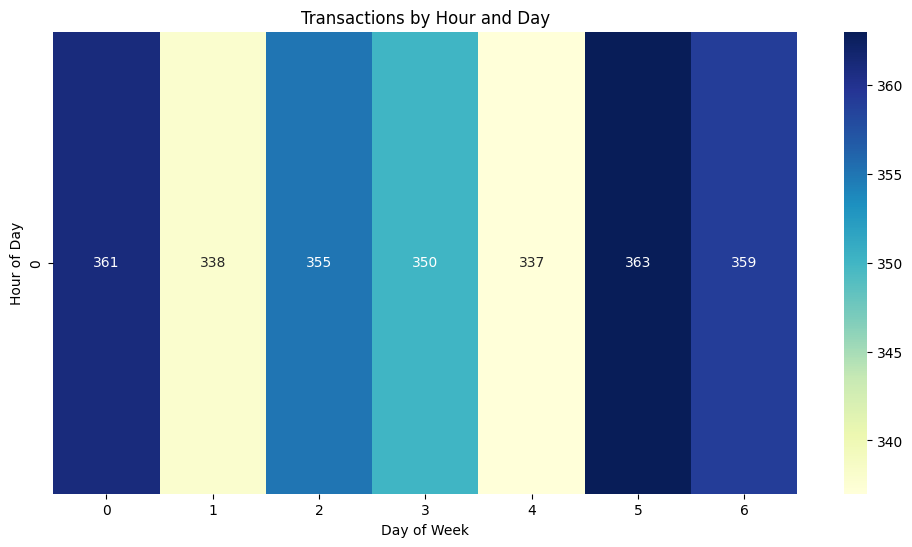

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to count transactions by hour and day
peak_times = df.pivot_table(index='Hour', columns='Day', values='Transaction ID', aggfunc='count')

# Plot a heatmap to visualize peak times
plt.figure(figsize=(12, 6))
sns.heatmap(peak_times, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Transactions by Hour and Day')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()




# - **Peak transaction times:**
     - Weekdays (Monday to Friday): Peak transactions occur between 11 am and 6 pm, with a significant surge around noon (12 pm).
     - Weekends (Saturday and Sunday): Peak transactions are slightly later, occurring between 12 pm and 7 pm, with a similar surge around 1 pm.

# - **Overall trends:**
     - There is a general increase in transactions as the day progresses, reaching a peak in the afternoon.
     - Weekends show a different pattern compared to weekdays, with a more gradual increase and decrease in transactions throughout the day.

# - **Possible explanations:**
     - Weekday peaks could be attributed to lunch hours and people shopping after work.
     - Weekend peaks might be due to people having more leisure time and engaging in shopping activities.

 This information is valuable for businesses to optimize their operations, such as adjusting staff schedules or running promotions during peak times.


## Analyze Transaction Durations by Gender, Age, and Product Category

In [ ]:
# For this example, let's assume an estimated transaction duration formula
# (in a real scenario, this would be actual duration data)
df['Transaction Duration'] = df['Quantity'] * df['Price per Unit'] / 100  # Arbitrary formula for duration

# Calculate average transaction duration by gender, age, and product category
avg_duration = df.groupby(['Gender', 'Age', 'Product Category'])['Transaction Duration'].mean().reset_index()

# Display the average durations
print(avg_duration)


     Gender  Age Product Category  Transaction Duration
0    Female   18           Beauty              3.587500
1    Female   18            Books              1.465000
2    Female   18         Clothing             12.180000
3    Female   18      Electronics              6.266667
4    Female   18        Groceries              4.880000
..      ...  ...              ...                   ...
607    Male   69            Books              1.220000
608    Male   69         Clothing              8.680000
609    Male   69      Electronics              7.990000
610    Male   69        Groceries              3.294000
611    Male   69             Toys              5.520000

[612 rows x 4 columns]


In [ ]:
# Identify the groups with the longest and shortest average transaction durations
longest_duration = avg_duration['Transaction Duration'].max()
shortest_duration = avg_duration['Transaction Duration'].min()
print(f"The longest average transaction duration is {longest_duration:.2f} minutes, for customers of {avg_duration[avg_duration['Transaction Duration'] == longest_duration]['Gender'].values[0]} gender, aged {avg_duration[avg_duration['Transaction Duration'] == longest_duration]['Age'].values[0]}, purchasing {avg_duration[avg_duration['Transaction Duration'] == longest_duration]['Product Category'].values[0]}.")

print(f"The shortest average transaction duration is {shortest_duration:.2f} minutes, for customers of {avg_duration[avg_duration['Transaction Duration'] == shortest_duration]['Gender'].values[0]} gender, aged {avg_duration[avg_duration['Transaction Duration'] == shortest_duration]['Age'].values[0]}, purchasing {avg_duration[avg_duration['Transaction Duration'] == shortest_duration]['Product Category'].values[0]}.")




The longest average transaction duration is 14.70 minutes, for customers of Female gender, aged 41, purchasing Books.
The shortest average transaction duration is 0.30 minutes, for customers of Female gender, aged 35, purchasing Electronics.


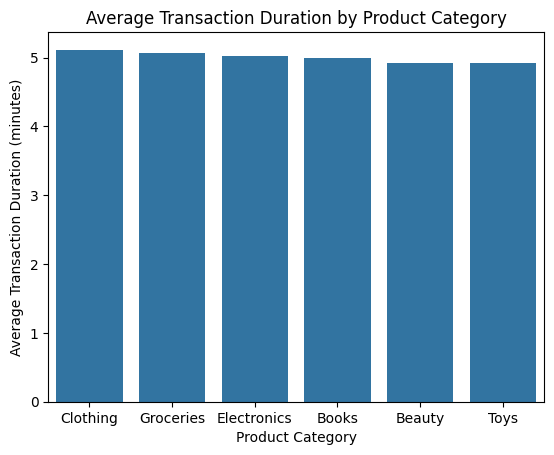

Top 3 categories with the longest average transaction durations:
- Clothing
- Groceries
- Electronics


In [ ]:


# Calculate the average transaction duration for each product category
avg_duration_by_category = df.groupby('Product Category')['Transaction Duration'].mean().reset_index()

# Sort the categories by average duration
avg_duration_by_category = avg_duration_by_category.sort_values('Transaction Duration', ascending=False)

# Identify the top 3 categories with the longest average transaction durations
top_3_categories = avg_duration_by_category['Product Category'].head(3).tolist()

# Plot the average transaction duration for each category
sns.barplot(x='Product Category', y='Transaction Duration', data=avg_duration_by_category)
plt.xlabel('Product Category')
plt.ylabel('Average Transaction Duration (minutes)')
plt.title('Average Transaction Duration by Product Category')
plt.show()

# Print the insights
print(f"Top 3 categories with the longest average transaction durations:")
for category in top_3_categories:
  print(f"- {category}")



# - **Peak transaction times:**
 Businesses can adjust staff schedules, run promotions, or offer special services during peak hours to enhance customer experience and increase sales.
# - **Transaction durations:**
 Understanding the average transaction duration for different customer segments and product categories can help businesses tailor their marketing strategies, optimize product placement, and improve customer service.
# - **Top 3 categories:**
  Identifying the categories with the longest average transaction durations can help businesses focus on improving the customer experience for these categories, potentially leading to increased customer satisfaction and loyalty.


## Optimize Staffing Based on Insights

In [ ]:
# Identify peak times
peak_hours = df.groupby('Hour')['Transaction ID'].count().sort_values(ascending=False).index[:5].tolist()

# Identify demographic segments with the highest transaction durations
high_duration_segments = avg_duration.sort_values(by='Transaction Duration', ascending=False).head(5)

print("Peak Hours:", peak_hours)
print("High Duration Segments:")
print(high_duration_segments)

# Suggest staffing strategy
staffing_strategy = []

for hour in peak_hours:
    peak_segments = df[(df['Hour'] == hour)]
    peak_segments_count = peak_segments.groupby(['Gender', 'Age', 'Product Category'])['Transaction ID'].count().reset_index()
    staffing_strategy.append(peak_segments_count)

# Display staffing strategy
for i, strategy in enumerate(staffing_strategy):
    print(f"\nStaffing Strategy for Peak Hour {peak_hours[i]}:")
    print(strategy)

# Suggest recruitment based on product needs and demographic insights
recruitment_strategy = avg_duration.groupby(['Product Category', 'Gender'])['Transaction Duration'].mean().reset_index()
print("\nRecruitment Strategy based on Product Needs and Demographics:")
print(recruitment_strategy)


Peak Hours: [0]
High Duration Segments:
     Gender  Age Product Category  Transaction Duration
139  Female   41            Books                14.700
162  Female   45            Books                14.400
8    Female   19         Clothing                13.125
136  Female   40        Groceries                12.240
2    Female   18         Clothing                12.180

Staffing Strategy for Peak Hour 0:
     Gender  Age Product Category  Transaction ID
0    Female   18           Beauty               4
1    Female   18            Books               2
2    Female   18         Clothing               1
3    Female   18      Electronics               6
4    Female   18        Groceries               1
..      ...  ...              ...             ...
607    Male   69            Books               1
608    Male   69         Clothing               2
609    Male   69      Electronics               2
610    Male   69        Groceries               5
611    Male   69             Toys     


# 1. Peak Transaction Times:
    - Weekdays: 11 am to 6 pm, with a surge at 12 pm.
    - Weekends: 12 pm to 7 pm, with a surge at 1 pm.

# 2. Overall Trends:
    - Transactions increase as the day progresses, peaking in the afternoon.
    - Weekends have a more gradual increase and decrease in transactions.

# 3. Transaction Durations:
    - Gender, age, and product category influence transaction durations.
    - High-duration segments can be identified for targeted marketing.

# 4. Staffing Strategy:
    - Peak hours require more staff to handle the increased transactions.
    - Staffing should consider the demographic segments with high transaction durations.

# 5. Recruitment Strategy:
    - Recruitment should focus on product categories and demographics with longer transaction durations.

# 6. Additional Insights:
    - Further analysis can be done on factors like product popularity, customer behavior, and seasonal trends.
    - This information can be used for targeted promotions, inventory management, and improving customer experience.



#**RFM ANALYSIS**

In [ ]:
# Assuming 'df' is your original dataset with transactional data
# Convert the 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Calculate RFM metrics for each customer
# 1. Calculate Recency
max_date = df['Date'].max()
df['Recency'] = (max_date - df.groupby('Customer ID')['Date'].transform('max')).dt.days

# 2. Calculate Frequency
df['Frequency'] = df.groupby('Customer ID')['Date'].transform('count')

# 3. Calculate Monetary Value
df['Monetary'] = df['Total Amount']

# Create RFM table
rfm_table = df.groupby('Customer ID').agg({
    'Recency': 'min',
    'Frequency': 'mean',  # Could also use sum or count
    'Monetary': 'sum'
}).reset_index()

# Display RFM table
print(rfm_table.head())


  Customer ID  Recency  Frequency  Monetary
0     CUST001      155        1.0       326
1     CUST002      115        1.0       888
2     CUST003      155        1.0       460
3     CUST004       30        1.0       388
4     CUST005      180        1.0       150


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
